<a href="https://colab.research.google.com/github/TRANQUOCHUY202/AI/blob/main/bt1_27_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

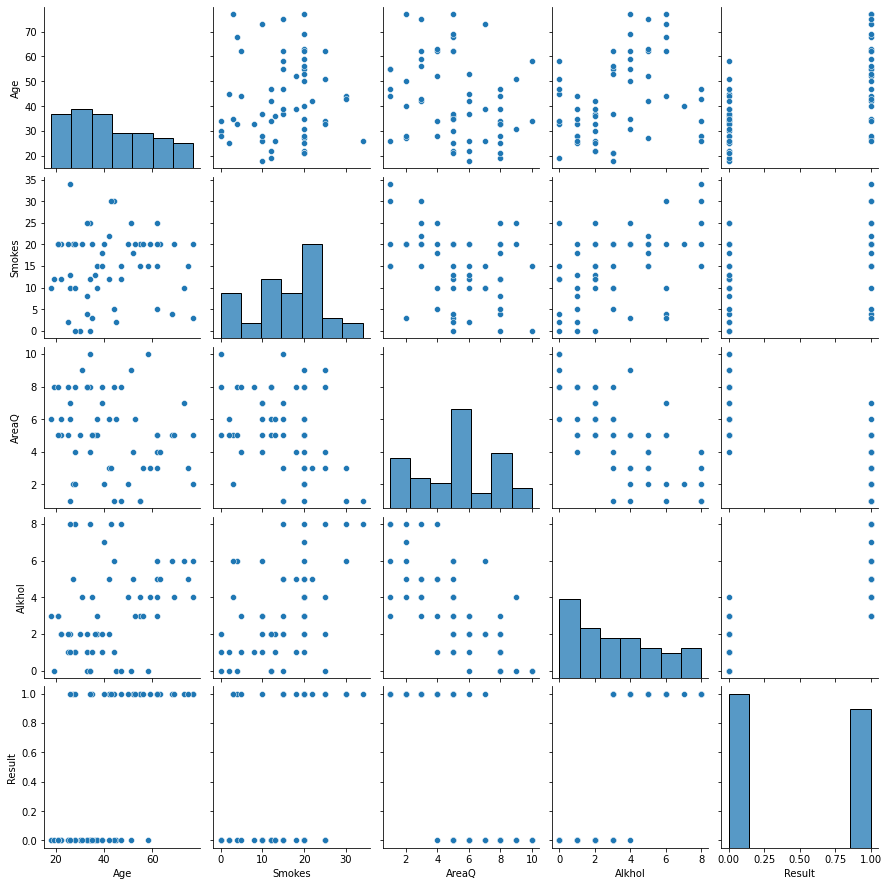

In [ ]:
from keras.utils import to_categorical # Nhập hàm to_categorical để chuyển nhãn thành dạng one-hot vector

# Chuyển đổi kích thước và định dạng dữ liệu đào tạo và kiểm tra
train_images = train_images.reshape((60000, 28*28)) # Chuyển ảnh 2D thành vector 1D
train_images = train_images.astype('float32')/255 # Tiêu chuẩn hóa dữ liệu về dạng [0,1]
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

# Chuyển đổi nhãn thành dạng one-hot vector
train_labels = to_categorical(train_labels, 10) # 10 lớp tương ứng với các chữ số từ 0 đến 9
test_labels = to_categorical(test_labels, 10)

# Biên dịch mô hình với bộ tối ưu RMSprop và hàm mất mát categorical crossentropy để đánh giá hiệu suất của mô hình
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Huấn luyện mô hình trên tập dữ liệu đào tạo với 10 epoch và một lô học kích thước 128
model.fit(train_images, train_labels, epochs = 10, batch_size = 128) 

# Đánh giá độ chính xác của mô hình trên tập dữ liệu kiểm tra
test_loss, test_acc = model.evaluate(test_images, test_labels)

# In kết quả đánh giá độ chính xác và hàm mất mát của mô hình trên tập dữ liệu kiểm tra
print('Test accuracy: ', test_acc)
print('Test loss: ', test_loss)import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import linear_model
import seaborn as sas
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('lung_cancer_examples.csv')
data.drop(data.columns[[0]],axis=1).head(2)
data.head()
sas.pairplot(data)

<Axes: >

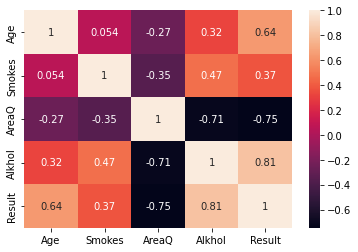

In [ ]:
corr = data.corr()
sas.heatmap(corr,annot = True)


In [ ]:
#Trần Quốc Huy _ 20146495
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = 'lung_cancer_examples.csv'
data = pd.read_csv(url)
data
correlation=data.corr()
print(correlation)


             Age    Smokes     AreaQ    Alkhol    Result
Age     1.000000  0.053665 -0.268957  0.318621  0.637726
Smokes  0.053665  1.000000 -0.353295  0.469915  0.373444
AreaQ  -0.268957 -0.353295  1.000000 -0.714412 -0.746621
Alkhol  0.318621  0.469915 -0.714412  1.000000  0.810439
Result  0.637726  0.373444 -0.746621  0.810439  1.000000


In [ ]:
X = data.drop(data.columns[0:2], axis=1)
y = data['Smokes']
print(X[10:16])
print(y[10:16])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
model = Perceptron(max_iter=40,eta0=0.1,random_state=0); #max_iter số lần học, eta tốc độ học, random_state chọn 1 số ngẫu nhiên
model.fit(X_train_std,y_train)
y_pred = model.predict(X_test_std)
print(y_pred)
print(y_test)
print('Độ chính xác của mô hình: ', accuracy_score(y_test, y_pred));
print("Do chinh xac train:",model.score(X_train,y_train));
print("Do chinh xac test:",model.score(X_test,y_test));

    Age  Smokes  AreaQ  Alkhol  Result
10   33       4      8       0       0
11   18      10      6       3       0
12   25       2      5       1       0
13   28      20      2       8       1
14   34      25      4       8       1
15   39      18      8       1       0
10     4
11    10
12     2
13    20
14    25
15    18
Name: Smokes, dtype: int64
[15  3 10 10 10 10 22 25 10 25 25 30  5 25 10 15 25 15]
8      2
32    15
21     8
39    10
4      4
23     5
36    20
52    34
2      0
33    25
57    30
22    20
0      3
35    20
10     4
31    20
58    25
28    20
Name: Smokes, dtype: int64
Độ chính xác của mô hình:  0.16666666666666666
Do chinh xac train: 0.1951219512195122
Do chinh xac test: 0.1111111111111111


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


So nay la:  3


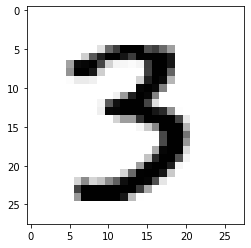

In [58]:
import matplotlib.pyplot as plt

hinh = train_images[10000]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('So nay la: ', train_labels[10000])

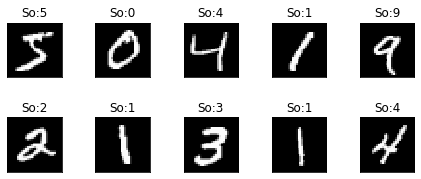

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap = 'gray', interpolation = 'none')
    plt.title('So:{}'.format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])


In [ ]:
#Tao mo hinh
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(28*28,), activation = 'relu'))
model.add(layers.Dense(1, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize train images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Convert train labels to categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Create the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)






Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2658 - accuracy: 0.9241
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1081 - accuracy: 0.9680
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0704 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0508 - accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0386 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0295 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0215 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0168 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0128 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.98

1/1 [==============================] - 0s 15ms/step
3
1/1 [==============================] - 0s 15ms/step
So nay la:  [[5 5 5 5 5 5 5 5 5 5]]


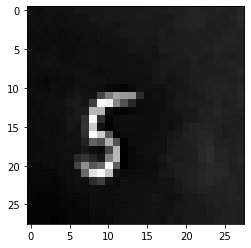

In [60]:
import numpy as np
from PIL import Image
import cv2 
import matplotlib.pyplot as plt
import numpy as np


# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# tải hình ảnh và chuyển sang chế độ xám
image = Image.open("5.jpg").convert('L')
# thay dổi kích thước ảnh 
image = image.resize((28, 28))
# chuyển ảnh thành mảng 
image_array = np.array(image)
# làm phẳng mảng 
image_array = image_array.reshape((1, 28 * 28))

image_array = image_array.astype('float32') / 255


prediction = model.predict(image_array)

# in lớp dự đoán
print(np.argmax(prediction))
prediction = model.predict(image_array)
i = np.uint8(prediction)
train_images[i]
plt.imshow(image, cmap = plt.cm.binary)
plt.show
print('So nay la: ', train_labels[i])
